<a href="https://colab.research.google.com/github/jenleemcnew/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Load the charity_data.csv file into a Pandas DataFrame
# If the file is online:
url = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
df = pd.read_csv(url)

# Step 3: Display the first few rows of the DataFrame to verify data loading
df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Drop the 'EIN' and 'NAME' columns as they are not beneficial for modeling
df = df.drop(columns=['EIN', 'NAME'])

# Check value counts for 'APPLICATION_TYPE' and replace rare occurrences with 'Other'
application_counts = df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_counts[application_counts < 500].index
df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(application_types_to_replace, 'Other')

# Check value counts for 'CLASSIFICATION' and replace rare occurrences with 'Other'
classification_counts = df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts[classification_counts < 1000].index
df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(classifications_to_replace, 'Other')

# Convert categorical variables to numeric using pd.get_dummies()
df_encoded = pd.get_dummies(df, drop_first=True)

# Define the target variable and feature variables
y = df_encoded['IS_SUCCESSFUL']
X = df_encoded.drop(columns=['IS_SUCCESSFUL'])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the training and testing sets to confirm
print(f"Training set shape: X_train: {X_train_scaled.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test_scaled.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (27439, 36), y_train: (27439,)
Testing set shape: X_test: (6860, 36), y_test: (6860,)


In [6]:
#Added AI suggested changes to increase accuracy.
#Import necessary TensorFlow libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

# Define the Sequential model
nn_optimized = tf.keras.models.Sequential()

# Add the input layer and first hidden layer
# Increased number of neurons to 100 and added 'relu' activation function
nn_optimized.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add a second hidden layer with 50 neurons and 'relu' activation
nn_optimized.add(Dense(units=50, activation='relu'))

# Add a third hidden layer with 30 neurons and 'relu' activation
nn_optimized.add(Dense(units=30, activation='relu'))

# Add a Dropout layer to prevent overfitting (20% of neurons will be randomly dropped)
nn_optimized.add(Dropout(0.2))

# Add the output layer with a 'sigmoid' activation for binary classification
nn_optimized.add(Dense(units=1, activation='sigmoid'))

# Compile the model with 'adam' optimizer and 'binary_crossentropy' loss
nn_optimized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and monitor validation accuracy
history = nn_optimized.fit(X_train_scaled, y_train,
                           epochs=100,  # Increased the number of epochs for better learning
                           batch_size=32,  # Keep batch size as 32
                           validation_data=(X_test_scaled, y_test))

# Evaluate the model performance on the test set
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7023 - loss: 0.5944 - val_accuracy: 0.7264 - val_loss: 0.5650
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7298 - loss: 0.5550 - val_accuracy: 0.7211 - val_loss: 0.5665
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7282 - loss: 0.5593 - val_accuracy: 0.7255 - val_loss: 0.5619
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7279 - loss: 0.5590 - val_accuracy: 0.7235 - val_loss: 0.5600
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7338 - loss: 0.5513 - val_accuracy: 0.7251 - val_loss: 0.5576
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7328 - loss: 0.5502 - val_accuracy: 0.7289 - val_loss: 0.5562
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7315 - loss: 0.5512 - val_accuracy: 0.7273 - val_loss: 0.5584
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7309 - loss: 0.5506 - val_accu

In [ ]:
#Second Attempt - Accuracy 73%

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7081 - loss: 0.5870 - val_accuracy: 0.7238 - val_loss: 0.5667
Epoch 2/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7283 - loss: 0.5599 - val_accuracy: 0.7213 - val_loss: 0.5608
Epoch 3/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7299 - loss: 0.5563 - val_accuracy: 0.7224 - val_loss: 0.5662
Epoch 4/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7234 - loss: 0.5628 - val_accuracy: 0.7255 - val_loss: 0.5675
Epoch 5/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7334 - loss: 0.5503 - val_accuracy: 0.7292 - val_loss: 0.5610
Epoch 6/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7329 - loss: 0.5500 - val_accuracy: 0.7238 - val_loss: 0.5602
Epoch 7/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7258 - loss: 0.5590 - val_accuracy: 0.7257 - val_loss: 0.5578
Epoch 8/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7354 - loss: 0.5485 - val_acc

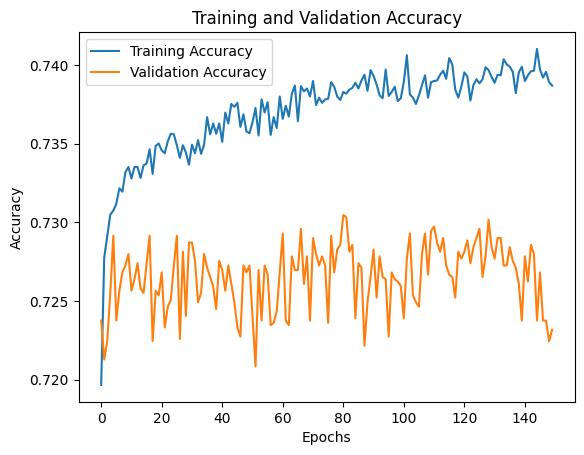

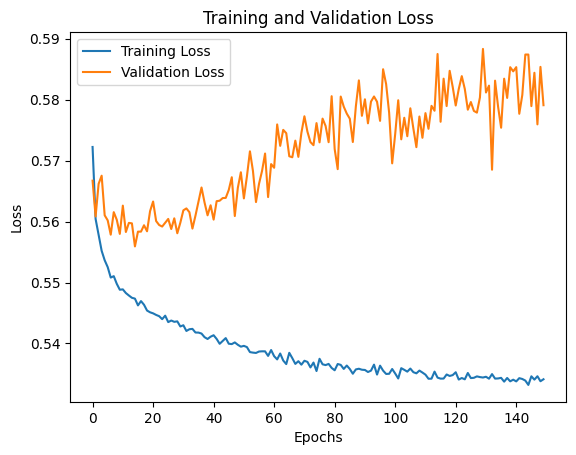

In [8]:
# Added AI suggested preprocessing changes to increase accuracy.
# Import necessary libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the data
url = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
df = pd.read_csv(url)

# Drop 'EIN' and 'NAME' columns as they are not beneficial
df = df.drop(columns=['EIN', 'NAME'])

# Check and bin 'APPLICATION_TYPE' to group rare occurrences
application_counts = df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_counts[application_counts < 500].index
df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(application_types_to_replace, 'Other')

# Check and bin 'CLASSIFICATION' to group rare occurrences
classification_counts = df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts[classification_counts < 1000].index
df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(classifications_to_replace, 'Other')

# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Split data into features and target
y = df_encoded['IS_SUCCESSFUL']
X = df_encoded.drop(columns=['IS_SUCCESSFUL'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the optimized neural network model
nn_optimized = tf.keras.models.Sequential()

# Input layer and first hidden layer with 150 neurons
nn_optimized.add(tf.keras.layers.Dense(units=150, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add a second hidden layer with 100 neurons
nn_optimized.add(tf.keras.layers.Dense(units=100, activation='tanh'))

# Add a third hidden layer with 50 neurons
nn_optimized.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Add a dropout layer to reduce overfitting
nn_optimized.add(tf.keras.layers.Dropout(0.3))

# Add a fourth hidden layer with 30 neurons
nn_optimized.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_optimized.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn_optimized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs and monitor validation accuracy
history = nn_optimized.fit(X_train_scaled, y_train,
                           epochs=150,  # Increased number of epochs
                           batch_size=32,  # Adjust batch size as necessary
                           validation_data=(X_test_scaled, y_test))

# Evaluate the model on test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Third Attempt Accuracy: 72%

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6879 - loss: 0.6032 - val_accuracy: 0.7273 - val_loss: 0.5630
Epoch 2/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7278 - loss: 0.5678 - val_accuracy: 0.7187 - val_loss: 0.5665
Epoch 3/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7275 - loss: 0.5607 - val_accuracy: 0.7238 - val_loss: 0.5642
Epoch 4/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7272 - loss: 0.5611 - val_accuracy: 0.7224 - val_loss: 0.5648
Epoch 5/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7299 - loss: 0.5570 - val_accuracy: 0.7276 - val_loss: 0.5586
Epoch 6/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7300 - loss: 0.5566 - val_accuracy: 0.7217 - val_loss: 0.5603
Epoch 7/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7325 - loss: 0.5570 - val_accuracy: 0.7210 - val_loss: 0.5665
Epoch 8/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7300 - loss: 0.5572 - val_accuracy: 0.7224

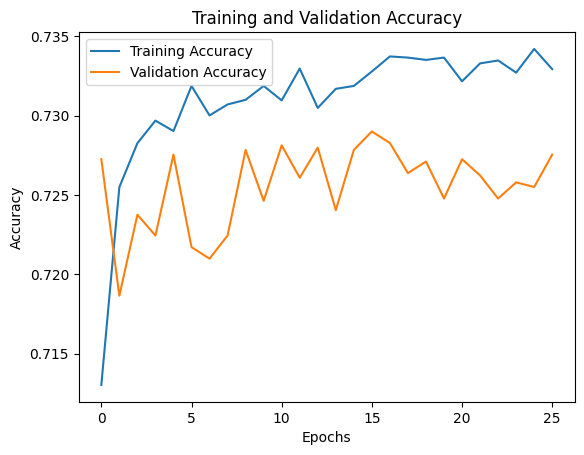

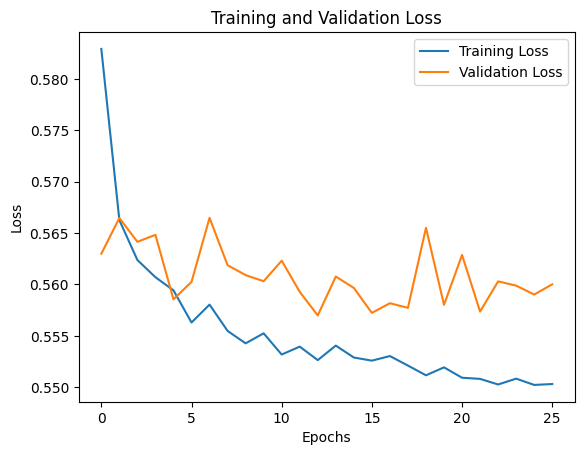

In [10]:
# Adding AI suggested changes to increase accuracy.
# Import necessary libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the data
url = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
df = pd.read_csv(url)

# Drop 'EIN' and 'NAME' columns as they are not beneficial
df = df.drop(columns=['EIN', 'NAME'])

# Check and bin 'APPLICATION_TYPE' to group rare occurrences
application_counts = df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_counts[application_counts < 500].index
df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(application_types_to_replace, 'Other')

# Check and bin 'CLASSIFICATION' to group rare occurrences
classification_counts = df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts[classification_counts < 1000].index
df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(classifications_to_replace, 'Other')

# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Split data into features and target
y = df_encoded['IS_SUCCESSFUL']
X = df_encoded.drop(columns=['IS_SUCCESSFUL'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the optimized neural network model
nn_optimized = tf.keras.models.Sequential()

# Input layer and first hidden layer with 200 neurons
nn_optimized.add(tf.keras.layers.Dense(units=200, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add a second hidden layer with 150 neurons
nn_optimized.add(tf.keras.layers.Dense(units=150, activation='tanh'))

# Add a dropout layer to reduce overfitting
nn_optimized.add(tf.keras.layers.Dropout(0.4))

# Add a third hidden layer with 100 neurons
nn_optimized.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Add another dropout layer
nn_optimized.add(tf.keras.layers.Dropout(0.3))

# Add a fourth hidden layer with 50 neurons
nn_optimized.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Add another dropout layer
nn_optimized.add(tf.keras.layers.Dropout(0.2))

# Output layer
nn_optimized.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn_optimized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model with Early Stopping
history = nn_optimized.fit(X_train_scaled, y_train,
                           epochs=200,  # Increased number of epochs
                           batch_size=32,  # Adjust batch size as necessary
                           validation_data=(X_test_scaled, y_test),
                           callbacks=[early_stopping])  # Add early stopping callback

# Evaluate the model on test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Fourth Attempt Accuracy: 72%

In [11]:
# Step 1: Save the optimized model to an HDF5 file
nn_optimized.save("AlphabetSoupCharity_Optimization.h5")

# Step 2: (Optional) Confirm that the model has been saved
print("Model saved as 'AlphabetSoupCharity_Optimization.h5'")


Model saved as 'AlphabetSoupCharity_Optimization.h5'
